# Personalized Medicine Recommendation System

PANASA THARUN KUMAR
BT22CSE083


In [3]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
df=pd.read_csv('drugsComTest.csv')

In [5]:
df.head()

,index,uniqueID,drugName,condition,Reason,review,rating,date,usefulCount,Description
0,0,163740.0,Mirtazapine,Depression,NaN,"""I&#039;ve tried a few antidepressants over th...",10.0,28-Feb-12,22.0,Mild to moderate acne (spots)
1,1,206473.0,Mesalamine,"Crohn's Disease, Maintenance",Acne,"""My son has Crohn&#039;s disease and has done ...",8.0,17-May-09,17.0,A RET 0.025% is a prescription medicine that i...
2,2,159672.0,Bactrim,Urinary Tract Infection,Acne,"""Quick reduction of symptoms""",9.0,29-Sep-17,3.0,It is used to treat acne vulgaris in people 12...
3,3,39293.0,Contrave,Weight Loss,Acne,"""Contrave combines drugs that were used for al...",9.0,05-Mar-17,35.0,It is used to treat acne vulgaris in people 12...
4,4,97768.0,Cyclafem 1 / 35,Birth Control,Acne,"""I have been on this birth control for one cyc...",9.0,22-Oct-15,4.0,treat the most severe form of acne (nodular ac...


In [6]:
df

,index,uniqueID,drugName,condition,Reason,review,rating,date,usefulCount,Description
0,0,163740.0,Mirtazapine,Depression,NaN,"""I&#039;ve tried a few antidepressants over th...",10.0,28-Feb-12,22.0,Mild to moderate acne (spots)
1,1,206473.0,Mesalamine,"Crohn's Disease, Maintenance",Acne,"""My son has Crohn&#039;s disease and has done ...",8.0,17-May-09,17.0,A RET 0.025% is a prescription medicine that i...
2,2,159672.0,Bactrim,Urinary Tract Infection,Acne,"""Quick reduction of symptoms""",9.0,29-Sep-17,3.0,It is used to treat acne vulgaris in people 12...
3,3,39293.0,Contrave,Weight Loss,Acne,"""Contrave combines drugs that were used for al...",9.0,05-Mar-17,35.0,It is used to treat acne vulgaris in people 12...
4,4,97768.0,Cyclafem 1 / 35,Birth Control,Acne,"""I have been on this birth control for one cyc...",9.0,22-Oct-15,4.0,treat the most severe form of acne (nodular ac...
...,...,...,...,...,...,...,...,...,...,...
9716,9716,NaN,NaN,NaN,Wound,NaN,NaN,NaN,NaN,NaN
9717,9717,NaN,NaN,NaN,Wound,NaN,NaN,NaN,NaN,NaN
9718,9718,NaN,NaN,NaN,Wound,NaN,NaN,NaN,NaN,NaN
9719,9719,NaN,NaN,NaN,Wound,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns.tolist()

['index',
 'uniqueID',
 'drugName',
 'condition',
 'Reason',
 'review',
 'rating',
 'date',
 'usefulCount',
 'Description']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        9721 non-null   int64  
 1   uniqueID     1813 non-null   float64
 2   drugName     1813 non-null   object 
 3   condition    1802 non-null   object 
 4   Reason       9720 non-null   object 
 5   review       1812 non-null   object 
 6   rating       1812 non-null   float64
 7   date         1812 non-null   object 
 8   usefulCount  1812 non-null   float64
 9   Description  1798 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 759.6+ KB


In [9]:
df.nunique()

index          9721
uniqueID       1813
drugName        674
condition       262
Reason           50
review         1809
rating           10
date           1319
usefulCount     154
Description      38
dtype: int64

In [10]:
df.shape

(9721, 10)

In [11]:
df.isnull().sum()

index             0
uniqueID       7908
drugName       7908
condition      7919
Reason            1
review         7909
rating         7909
date           7909
usefulCount    7909
Description    7923
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df['Description']

1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
5       treat the most severe form of acne (nodular ac...
                              ...                        
1807    treatment for the treatment of diarrhea and co...
1808    treat symptomatic anaemia that is associated w...
1809    treat symptomatic anaemia in adult cancer pati...
1810     treat symptomatic anaemia in adult cancer pat...
1811    treat symptomatic anaemia that is associated w...
Name: Description, Length: 1787, dtype: object

In [15]:
df['Description'].apply(lambda x:x.split())

1       [A, RET, 0.025%, is, a, prescription, medicine...
2       [It, is, used, to, treat, acne, vulgaris, in, ...
3       [It, is, used, to, treat, acne, vulgaris, in, ...
4       [treat, the, most, severe, form, of, acne, (no...
5       [treat, the, most, severe, form, of, acne, (no...
                              ...                        
1807    [treatment, for, the, treatment, of, diarrhea,...
1808    [treat, symptomatic, anaemia, that, is, associ...
1809    [treat, symptomatic, anaemia, in, adult, cance...
1810    [treat, symptomatic, anaemia, in, adult, cance...
1811    [treat, symptomatic, anaemia, that, is, associ...
Name: Description, Length: 1787, dtype: object

In [16]:
df['Reason'] = df['Reason'].apply(lambda x:x.split())
df['Description'] = df['Description'].apply(lambda x:x.split())

In [17]:
df['Description'] = df['Description'].apply(lambda x:[i.replace(" ","") for i in x])

In [18]:
df['tags'] = df['Description'] + df['Reason'] 

In [19]:
new_df = df[['index','drugName','tags']]

In [20]:
new_df

,index,drugName,tags
1,1,Mesalamine,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,2,Bactrim,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,3,Contrave,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,4,Cyclafem 1 / 35,"[treat, the, most, severe, form, of, acne, (no..."
5,5,Zyclara,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
1807,1807,Etonogestrel,"[treatment, for, the, treatment, of, diarrhea,..."
1808,1808,Ambien,"[treat, symptomatic, anaemia, that, is, associ..."
1809,1809,Strattera,"[treat, symptomatic, anaemia, in, adult, cance..."
1810,1810,Meclizine,"[treat, symptomatic, anaemia, in, adult, cance..."


In [21]:
new_df['tags'].apply(lambda x:" ".join(x))

1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
5       treat the most severe form of acne (nodular ac...
                              ...                        
1807    treatment for the treatment of diarrhea and co...
1808    treat symptomatic anaemia that is associated w...
1809    treat symptomatic anaemia in adult cancer pati...
1810    treat symptomatic anaemia in adult cancer pati...
1811    treat symptomatic anaemia that is associated w...
Name: tags, Length: 1787, dtype: object

In [22]:
new_df

,index,drugName,tags
1,1,Mesalamine,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,2,Bactrim,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,3,Contrave,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,4,Cyclafem 1 / 35,"[treat, the, most, severe, form, of, acne, (no..."
5,5,Zyclara,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
1807,1807,Etonogestrel,"[treatment, for, the, treatment, of, diarrhea,..."
1808,1808,Ambien,"[treat, symptomatic, anaemia, that, is, associ..."
1809,1809,Strattera,"[treat, symptomatic, anaemia, in, adult, cance..."
1810,1810,Meclizine,"[treat, symptomatic, anaemia, in, adult, cance..."


In [23]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

In [24]:
new_df

,index,drugName,tags
1,1,Mesalamine,A RET 0.025% is a prescription medicine that i...
2,2,Bactrim,It is used to treat acne vulgaris in people 12...
3,3,Contrave,It is used to treat acne vulgaris in people 12...
4,4,Cyclafem 1 / 35,treat the most severe form of acne (nodular ac...
5,5,Zyclara,treat the most severe form of acne (nodular ac...
...,...,...,...
1807,1807,Etonogestrel,treatment for the treatment of diarrhea and co...
1808,1808,Ambien,treat symptomatic anaemia that is associated w...
1809,1809,Strattera,treat symptomatic anaemia in adult cancer pati...
1810,1810,Meclizine,treat symptomatic anaemia in adult cancer pati...


In [25]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [26]:
new_df

,index,drugName,tags
1,1,Mesalamine,a ret 0.025% is a prescription medicine that i...
2,2,Bactrim,it is used to treat acne vulgaris in people 12...
3,3,Contrave,it is used to treat acne vulgaris in people 12...
4,4,Cyclafem 1 / 35,treat the most severe form of acne (nodular ac...
5,5,Zyclara,treat the most severe form of acne (nodular ac...
...,...,...,...
1807,1807,Etonogestrel,treatment for the treatment of diarrhea and co...
1808,1808,Ambien,treat symptomatic anaemia that is associated w...
1809,1809,Strattera,treat symptomatic anaemia in adult cancer pati...
1810,1810,Meclizine,treat symptomatic anaemia in adult cancer pati...


In [27]:
import nltk

In [28]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=5000)

In [30]:
def stem(text):
  y = []

  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y) 

In [31]:
new_df['tags'] = new_df['tags'].apply(stem)

In [32]:
cv.fit_transform(new_df['tags']).toarray().shape

(1787, 144)

In [33]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [34]:
cv.get_feature_names_out()

array(['025', '12', 'abdomin', 'acid', 'acn', 'acne', 'activ', 'acut',
       'adhd', 'adult', 'age', 'allerg', 'allergi', 'alzheim',
       'alzheimer', 'amoebiasi', 'anaemia', 'angina', 'anti', 'anxieti',
       'appear', 'appetit', 'appli', 'area', 'arrhythmiasi', 'arthriti',
       'associ', 'becom', 'blackheads', 'blood', 'bon', 'bones', 'brain',
       'cancer', 'care', 'cases', 'cavity', 'chemotherapi', 'children',
       'chronic', 'cleanser', 'colorect', 'combin', 'condit', 'constip',
       'contracept', 'daili', 'dandruff', 'defici', 'dementia', 'dental',
       'depress', 'diarrhea', 'diseas', 'disord', 'dri', 'failur',
       'failure', 'feel', 'fine', 'folic', 'form', 'fresh', 'function',
       'genit', 'good', 'gravi', 'gum', 'ha', 'head', 'help', 'improv',
       'indic', 'infect', 'intestin', 'iron', 'itch', 'kidney', 'line',
       'lung', 'malignancies', 'marrow', 'medicin', 'mental', 'mild',
       'moder', 'moderate', 'muscl', 'myasthenia', 'myeloid', 'natur',
   

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
cosine_similarity(vectors)

array([[1.        , 0.25660012, 0.25660012, ..., 0.        , 0.        ,
        0.        ],
       [0.25660012, 1.        , 1.        , ..., 0.0727393 , 0.04303315,
        0.05555556],
       [0.25660012, 1.        , 1.        , ..., 0.0727393 , 0.04303315,
        0.05555556],
       ...,
       [0.        , 0.0727393 , 0.0727393 , ..., 1.        , 0.6761234 ,
        0.54554473],
       [0.        , 0.04303315, 0.04303315, ..., 0.6761234 , 1.        ,
        0.32274861],
       [0.        , 0.05555556, 0.05555556, ..., 0.54554473, 0.32274861,
        1.        ]])

In [37]:
similarity = cosine_similarity(vectors)

In [38]:
similarity[1]

array([0.25660012, 1.        , 1.        , ..., 0.0727393 , 0.04303315,
       0.05555556])

In [39]:
import pickle

In [40]:
pickle.dump(new_df.to_dict(),open('medicine_dict.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [41]:
summary = df[['uniqueID','drugName','condition','review','rating','date','usefulCount','Description']].describe(include='all')
print(summary)

             uniqueID        drugName      condition  \
count     1787.000000            1787           1787   
unique            NaN             668            260   
top               NaN  Levonorgestrel  Birth Control   
freq              NaN              48            337   
mean    119892.043649             NaN            NaN   
std      67567.287231             NaN            NaN   
min        397.000000             NaN            NaN   
25%      60318.000000             NaN            NaN   
50%     122708.000000             NaN            NaN   
75%     178135.500000             NaN            NaN   
max     232090.000000             NaN            NaN   

                                                   review       rating  \
count                                                1787  1787.000000   
unique                                               1784          NaN   
top     "I was given Linzess from my VA GI doctor. At ...          NaN   
freq                           

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

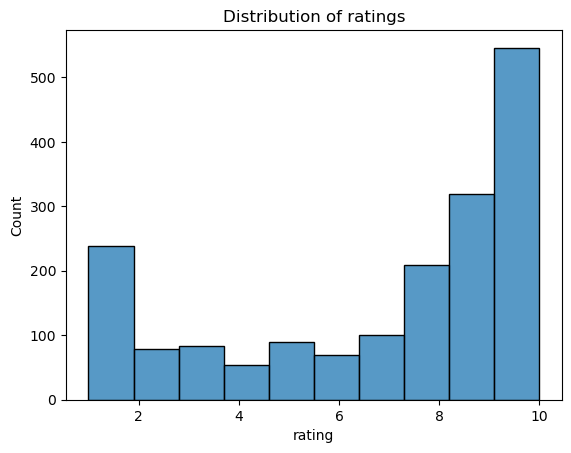

In [43]:
sns.histplot(data=df,x='rating',bins=10)
plt.title('Distribution of ratings')
plt.show()

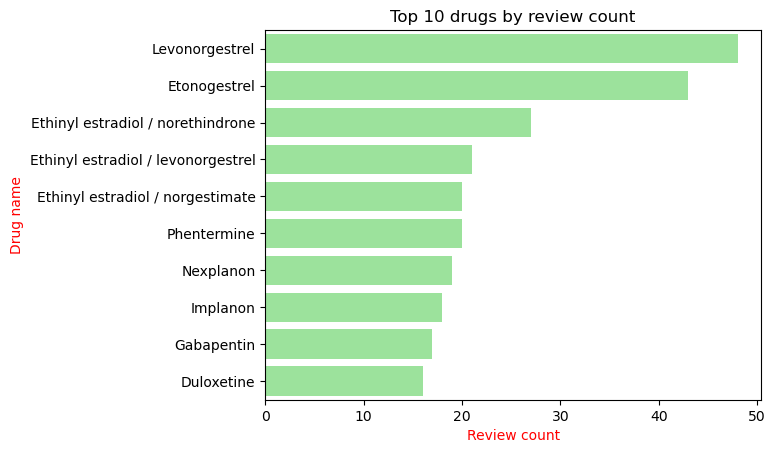

In [44]:
top_drugs=df['drugName'].value_counts().head(10)
sns.barplot(x=top_drugs.values,y=top_drugs.index,color='lightgreen')
plt.xlabel('Review count',color='RED')
plt.ylabel('Drug name',color='red')
plt.title('Top 10 drugs by review count')
plt.show()

In [45]:
top_drugs

drugName
Levonorgestrel                        48
Etonogestrel                          43
Ethinyl estradiol / norethindrone     27
Ethinyl estradiol / levonorgestrel    21
Ethinyl estradiol / norgestimate      20
Phentermine                           20
Nexplanon                             19
Implanon                              18
Gabapentin                            17
Duloxetine                            16
Name: count, dtype: int64

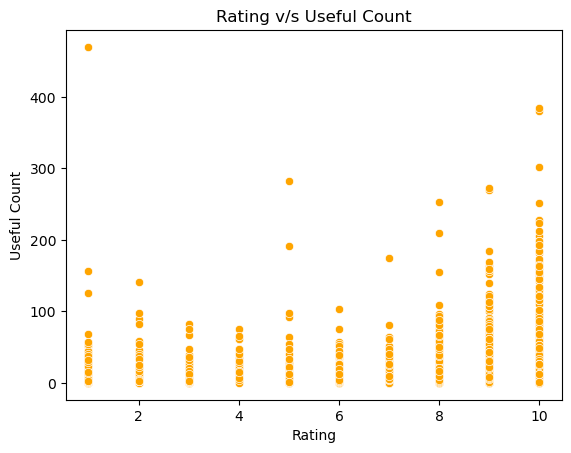

In [46]:
sns.scatterplot(data=df,x='rating',y='usefulCount',color='orange')
plt.title('Rating v/s Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

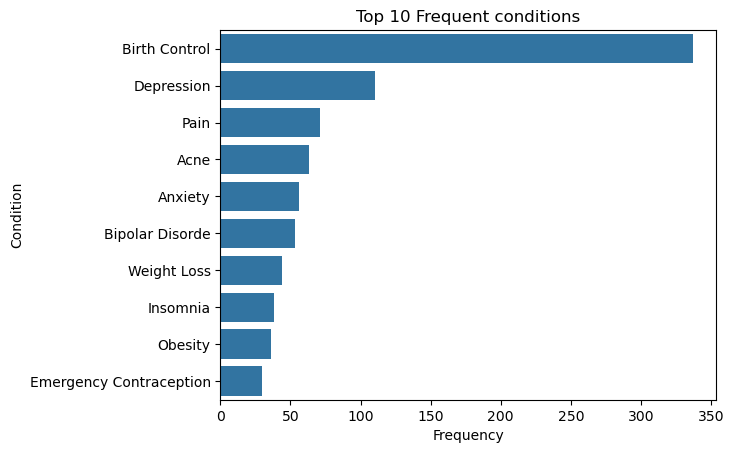

In [47]:
top_conditions=df['condition'].value_counts().head(10)
sns.barplot(x=top_conditions.values,y=top_conditions.index)
plt.title('Top 10 Frequent conditions')
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.show()

In [48]:
top_conditions

condition
Birth Control              337
Depression                 110
Pain                        71
Acne                        63
Anxiety                     56
Bipolar Disorde             53
Weight Loss                 44
Insomnia                    38
Obesity                     36
Emergency Contraception     30
Name: count, dtype: int64

In [49]:
def get_medications_for_condition(condition):
    medications = df[df['condition'] == condition]['drugName'].unique()#.head(5)
    print(medications)
get_medications_for_condition('Weight Loss')

['Contrave' 'Belviq' 'Phentermine' 'Adipex-P' 'Liraglutide' 'Qsymia'
 'Phentermine / topiramate' 'Victoza' 'Bupropion / naltrexone'
 'Lorcaserin']


In [50]:
df


,index,uniqueID,drugName,condition,Reason,review,rating,date,usefulCount,Description,tags
1,1,206473.0,Mesalamine,"Crohn's Disease, Maintenance",[Acne],"""My son has Crohn&#039;s disease and has done ...",8.0,17-May-09,17.0,"[A, RET, 0.025%, is, a, prescription, medicine...","[A, RET, 0.025%, is, a, prescription, medicine..."
2,2,159672.0,Bactrim,Urinary Tract Infection,[Acne],"""Quick reduction of symptoms""",9.0,29-Sep-17,3.0,"[It, is, used, to, treat, acne, vulgaris, in, ...","[It, is, used, to, treat, acne, vulgaris, in, ..."
3,3,39293.0,Contrave,Weight Loss,[Acne],"""Contrave combines drugs that were used for al...",9.0,05-Mar-17,35.0,"[It, is, used, to, treat, acne, vulgaris, in, ...","[It, is, used, to, treat, acne, vulgaris, in, ..."
4,4,97768.0,Cyclafem 1 / 35,Birth Control,[Acne],"""I have been on this birth control for one cyc...",9.0,22-Oct-15,4.0,"[treat, the, most, severe, form, of, acne, (no...","[treat, the, most, severe, form, of, acne, (no..."
5,5,208087.0,Zyclara,Keratosis,[Acne],"""4 days in on first 2 weeks. Using on arms an...",4.0,03-Jul-14,13.0,"[treat, the, most, severe, form, of, acne, (no...","[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...,...,...,...,...,...,...,...,...
1807,1807,143994.0,Etonogestrel,Birth Control,[Depression],"""I Have had the implant for 4 months now, the ...",3.0,28-Jul-16,3.0,"[treatment, for, the, treatment, of, diarrhea,...","[treatment, for, the, treatment, of, diarrhea,..."
1808,1808,96935.0,Ambien,Insomnia,[Depression],"""I&#039;ve been taking Ambien for many years. ...",9.0,14-Aug-16,30.0,"[treat, symptomatic, anaemia, that, is, associ...","[treat, symptomatic, anaemia, that, is, associ..."
1809,1809,217773.0,Strattera,ADHD,[Depression],"""I had such high hopes for Strattera, but it w...",1.0,09-Nov-15,15.0,"[treat, symptomatic, anaemia, in, adult, cance...","[treat, symptomatic, anaemia, in, adult, cance..."
1810,1810,56825.0,Meclizine,Vertig,[Depression],"""I&#039;m a 71 year old woman. Have vertigo an...",4.0,21-Jun-13,47.0,"[treat, symptomatic, anaemia, in, adult, cance...","[treat, symptomatic, anaemia, in, adult, cance..."


In [51]:
df.head()


,index,uniqueID,drugName,condition,Reason,review,rating,date,usefulCount,Description,tags
1,1,206473.0,Mesalamine,"Crohn's Disease, Maintenance",[Acne],"""My son has Crohn&#039;s disease and has done ...",8.0,17-May-09,17.0,"[A, RET, 0.025%, is, a, prescription, medicine...","[A, RET, 0.025%, is, a, prescription, medicine..."
2,2,159672.0,Bactrim,Urinary Tract Infection,[Acne],"""Quick reduction of symptoms""",9.0,29-Sep-17,3.0,"[It, is, used, to, treat, acne, vulgaris, in, ...","[It, is, used, to, treat, acne, vulgaris, in, ..."
3,3,39293.0,Contrave,Weight Loss,[Acne],"""Contrave combines drugs that were used for al...",9.0,05-Mar-17,35.0,"[It, is, used, to, treat, acne, vulgaris, in, ...","[It, is, used, to, treat, acne, vulgaris, in, ..."
4,4,97768.0,Cyclafem 1 / 35,Birth Control,[Acne],"""I have been on this birth control for one cyc...",9.0,22-Oct-15,4.0,"[treat, the, most, severe, form, of, acne, (no...","[treat, the, most, severe, form, of, acne, (no..."
5,5,208087.0,Zyclara,Keratosis,[Acne],"""4 days in on first 2 weeks. Using on arms an...",4.0,03-Jul-14,13.0,"[treat, the, most, severe, form, of, acne, (no...","[treat, the, most, severe, form, of, acne, (no..."


In [52]:
df.tail()

,index,uniqueID,drugName,condition,Reason,review,rating,date,usefulCount,Description,tags
1807,1807,143994.0,Etonogestrel,Birth Control,[Depression],"""I Have had the implant for 4 months now, the ...",3.0,28-Jul-16,3.0,"[treatment, for, the, treatment, of, diarrhea,...","[treatment, for, the, treatment, of, diarrhea,..."
1808,1808,96935.0,Ambien,Insomnia,[Depression],"""I&#039;ve been taking Ambien for many years. ...",9.0,14-Aug-16,30.0,"[treat, symptomatic, anaemia, that, is, associ...","[treat, symptomatic, anaemia, that, is, associ..."
1809,1809,217773.0,Strattera,ADHD,[Depression],"""I had such high hopes for Strattera, but it w...",1.0,09-Nov-15,15.0,"[treat, symptomatic, anaemia, in, adult, cance...","[treat, symptomatic, anaemia, in, adult, cance..."
1810,1810,56825.0,Meclizine,Vertig,[Depression],"""I&#039;m a 71 year old woman. Have vertigo an...",4.0,21-Jun-13,47.0,"[treat, symptomatic, anaemia, in, adult, cance...","[treat, symptomatic, anaemia, in, adult, cance..."
1811,1811,38250.0,Albuterol,"Asthma, acute",[Depression],"""Doesn&#039;t work! This is a totally ineffect...",1.0,25-Oct-17,2.0,"[treat, symptomatic, anaemia, that, is, associ...","[treat, symptomatic, anaemia, that, is, associ..."


In [53]:
df.columns.tolist()

['index',
 'uniqueID',
 'drugName',
 'condition',
 'Reason',
 'review',
 'rating',
 'date',
 'usefulCount',
 'Description',
 'tags']

In [54]:
summary = df[['uniqueID','drugName','condition','review','rating','date','usefulCount','Description']].describe(include='all')
print(summary)

             uniqueID        drugName      condition  \
count     1787.000000            1787           1787   
unique            NaN             668            260   
top               NaN  Levonorgestrel  Birth Control   
freq              NaN              48            337   
mean    119892.043649             NaN            NaN   
std      67567.287231             NaN            NaN   
min        397.000000             NaN            NaN   
25%      60318.000000             NaN            NaN   
50%     122708.000000             NaN            NaN   
75%     178135.500000             NaN            NaN   
max     232090.000000             NaN            NaN   

                                                   review       rating  \
count                                                1787  1787.000000   
unique                                               1784          NaN   
top     "I was given Linzess from my VA GI doctor. At ...          NaN   
freq                           

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


df = df[['drugName', 'condition']]

df.dropna(subset=['condition'], inplace=True)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['condition'])

user_condition = input("Enter your health condition: ")

user_condition_tfidf = tfidf_vectorizer.transform([user_condition])

similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)

top_indices = similarity_scores.argsort()[0][::-1][:10]  # Select top 10 indices

top_medicines = df['drugName'].iloc[top_indices]

print("Top 10 recommended medicines for", user_condition, ":")
for medicine in top_medicines:
    print(medicine)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = df[['drugName', 'condition']]

df.dropna(subset=['condition'], inplace=True)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['condition'])


user_condition = input("Enter your health condition: ")


user_condition_tfidf = tfidf_vectorizer.transform([user_condition])


similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)


top_indices = similarity_scores.argsort()[0][::-1]

top_medicines = df['drugName'].iloc[top_indices]

print("Top recommended medicines for", user_condition, ":")
for medicine in top_medicines:
    print(medicine)